## Transcriptome discovery

- Investigate the counts distribution for all the 7 samples

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seabor5n as sns
from scipy import stats

In [21]:
counts_df = pd.read_csv('/home/jiguo/data/data/reverse_stranded/counts/filtered_annotated_counts.txt',sep='\t', index_col=0)
sample_info = pd.read_csv('/home/jiguo/data/data/reverse_stranded/counts/sample_metadata.csv', index_col=0)

In [ ]:
# keep genes with at least 10 counts in at least 2 samples
keep = (counts_df>=10).sum(axis=1) >= 2
counts_filtered = counts_df[keep]
print(f'filtered from {counts_df.shape[0]} to {counts_filtered.shape[0]} genes')

filtered from 67176 to 19470 genes


In [23]:
cpm_before = counts_df.div(counts_df.sum(axis=0), axis=1) * 1e6
cpm_after = counts_filtered.div(counts_filtered.sum(axis=0), axis=1) * 1e6

# Calculate mean expression per gene
mean_expr_before = cpm_before.mean(axis=1)
mean_expr_after = cpm_after.mean(axis=1)


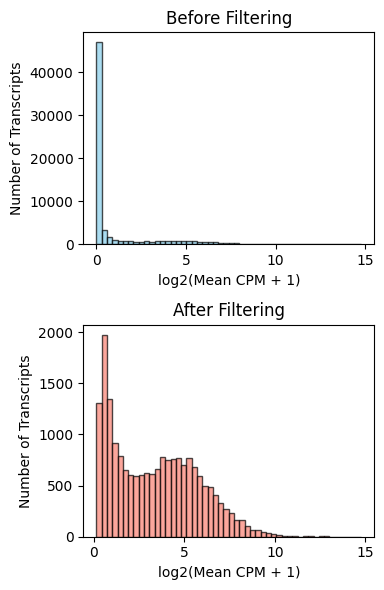

In [24]:
# vertically arrange the plots
fig, axes = plt.subplots(2, 1, figsize=(4,6))


axes[0].hist(np.log2(mean_expr_before + 1), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Before Filtering')
axes[0].set_xlabel('log2(Mean CPM + 1)')
axes[0].set_ylabel('Number of Transcripts')

axes[1].hist(np.log2(mean_expr_after + 1), bins=50, color='salmon', edgecolor='black', alpha=0.7)
axes[1].set_title('After Filtering')
axes[1].set_xlabel('log2(Mean CPM + 1)')
axes[1].set_ylabel('Number of Transcripts')

plt.tight_layout()
plt.savefig('filtering_comparison_log.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
counts_filtered

,rep1_0,rep1_1,rep3_1,control,rep2_1,rep2_0,rep3_0
Geneid,,,,,,,
ENSG00000310526.1,95,91,321,45,28,36,991
ENSG00000241860.8,7,1,16,0,0,1,43
ENSG00000310527.1,20,64,464,43,48,42,1156
ENSG00000292994.2,2,4,43,5,6,16,41
ENSG00000290385.2,69,11,223,14,10,12,205
...,...,...,...,...,...,...,...
ENSG00000307470.1,54,59,37,6,12,6,53
ENSG00000299314.1,10,10,4,1,0,0,16
ENSG00000293753.1,16,20,2,0,0,0,0


In [8]:
# crop the filtered count matrix, only keep column reo1_0.
counts_filtered_reo1_0 = counts_filtered[['rep1_0']]
counts_df_reo1_0 = counts_df[['rep1_0']]

In [9]:
counts_df_reo1_0

,rep1_0
Geneid,
ENSG00000290825.2,0
ENSG00000310526.1,95
ENSG00000243485.6,0
ENSG00000290826.2,0
ENSG00000186092.7,0
...,...
ENSG00000309296.1,12
ENSG00000303573.1,0
ENSG00000306528.1,22


In [11]:
counts_filtered_reo1_0

,rep1_0
Geneid,
ENSG00000310526.1,95
ENSG00000241860.8,7
ENSG00000310527.1,20
ENSG00000292994.2,2
ENSG00000290385.2,69
...,...
ENSG00000307470.1,54
ENSG00000299314.1,10
ENSG00000293753.1,16


In [15]:
counts_df = counts_filtered
library_sizes = counts_df.sum(axis=0)
cpm = counts_df.div(library_sizes, axis=1) * 1e6 # axis =1 meaning column-wise division
log_cpm=np.log2(cpm + 1)  # define log-cpm for later data visualization
print("library sizes:\n", library_sizes)

library sizes:
 rep1_0     122827400
rep1_1     170128628
rep3_1     122301999
control    147923518
rep2_1     146520058
rep2_0     166128898
rep3_0      69710267
dtype: int64


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_cpm.T)  # transpose to have samples as rows

In [17]:
# Create PCA fataframe
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2'], 
    index=counts_filtered.columns)
pca_df = pca_df.join(sample_info)

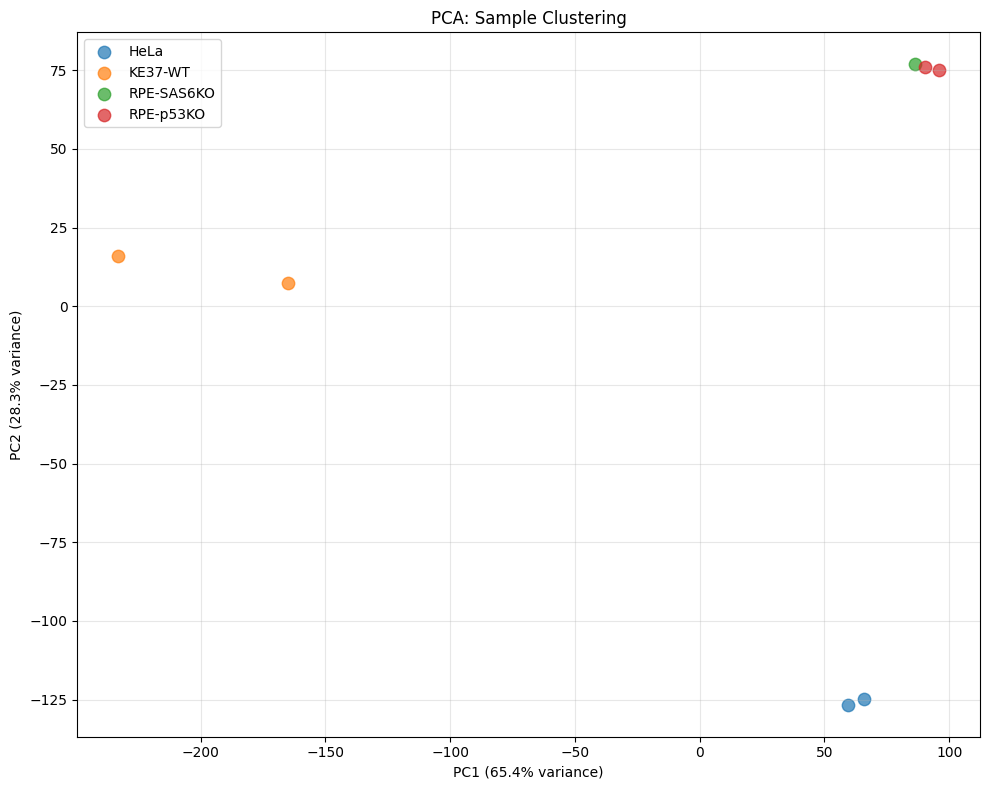

In [18]:
# Plot PCA
plt.figure(figsize=(10, 8))
for cellline in pca_df['cell_line'].unique():
    mask = pca_df['cell_line'] == cellline
    plt.scatter(pca_df.loc[mask, 'PC1'], 
                pca_df.loc[mask, 'PC2'],
                label=cellline, s=80, alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('PCA: Sample Clustering')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()